In [5]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA

In [6]:
hdulist = fits.open('2pt_NG_final_2ptunblind_02_24_21_wnz_redmagic_covupdate.fits')
hdulist.info()

Filename: 2pt_NG_final_2ptunblind_02_24_21_wnz_redmagic_covupdate.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  COVMAT        1 ImageHDU        17   (900, 900)   float64   
  2  xip           1 BinTableHDU     37   200R x 8C   [K, K, K, D, D, D, D, D]   
  3  xim           1 BinTableHDU     37   200R x 8C   [K, K, K, D, D, D, D, D]   
  4  gammat        1 BinTableHDU     35   400R x 7C   [K, K, K, D, D, D, D]   
  5  wtheta        1 BinTableHDU     37   100R x 8C   [K, K, K, D, D, D, D, D]   
  6  nz_source     1 BinTableHDU     32   300R x 7C   [D, D, D, D, D, D, D]   
  7  nz_lens       1 BinTableHDU     31   601R x 8C   [D, D, D, D, D, D, D, D]   
  8  nz_source_realisation_0    1 BinTableHDU     32   300R x 7C   [D, D, D, D, D, D, D]   
  9  nz_source_realisation_1    1 BinTableHDU     32   300R x 7C   [D, D, D, D, D, D, D]   
 10  nz_source_realisation_2    1 BinTableHDU     32   300R x 7C   [D, D, D, D, 

In [7]:
#data_vector_1 = np.genfromtxt("Y3_unblinded_final.txt")[:,1]
data_vector_1 = np.genfromtxt("des_y3_theory_3x2pt.modelvector")[:,1]
covfile = "cov_unblinded_final.txt"

ndata = data_vector_1 .shape[0] #Number of the data vector [0:899] for redMagic, to be replaced with angle

mask = np.genfromtxt("3x2pt_baseline.mask")[:,1]

data = np.genfromtxt(covfile)
cov = np.zeros((ndata,ndata))
for i in range(0,data.shape[0]):
    cov[int(data[i,0]), int(data[i,1])] = data[i,2]
    cov[int(data[i,1]), int(data[i,0])] = data[i,2]
    cov[int(data[i,0]),int(data[i,1])]*= mask[int(data[i,0])]*mask[int(data[i,1])]
    cov[int(data[i,1]),int(data[i,0])]*= mask[int(data[i,0])]*mask[int(data[i,1])] 
    

ind = np.arange(0, ndata) #index


nxip = 200
nxim = 200
nw = 100
nggl = ndata - nw - nxip -nxim

error = np.sqrt(np.diag(cov)) #error bar is the diagnized cov matrix, and 0 if masked

data_vector_1[data_vector_1 == 0] = np.nan #convert 0 to nan, so not plotting

In [8]:
#Not very automatic now, better check with the index:   
# hdulist['xip'].data.field('ANGBIN')

theta_xi_p = hdulist['xip'].data.field('ANG')

xi_p = hdulist['xip'].data.field('VALUE') # directly from fits(real data)
xi_p = xi_p * mask[0:200]
model_xi_p = data_vector_1[0:200] # From data-vector(can be model vector)
error_xi_p = error[0:200]


theta_xi_p_1_1 = theta_xi_p[0:20];theta_xi_p_1_2 = theta_xi_p[20:40];theta_xi_p_1_3 = theta_xi_p[40:60];theta_xi_p_1_4 = theta_xi_p[60:80]
theta_xi_p_2_2 = theta_xi_p[80:100];theta_xi_p_2_3 = theta_xi_p[100:120];theta_xi_p_2_4 = theta_xi_p[120:140]
theta_xi_p_3_3 = theta_xi_p[140:160];theta_xi_p_3_4 = theta_xi_p[160:180]
theta_xi_p_4_4 = theta_xi_p[180:200]

xi_p_1_1 = xi_p[0:20];xi_p_1_2 = xi_p[20:40];xi_p_1_3 = xi_p[40:60];xi_p_1_4 = xi_p[60:80]
xi_p_2_2 = xi_p[80:100];xi_p_2_3 = xi_p[100:120];xi_p_2_4 = xi_p[120:140]
xi_p_3_3 = xi_p[140:160];xi_p_3_4 = xi_p[160:180]
xi_p_4_4 = xi_p[180:200]

model_xi_p_1_1 = model_xi_p[0:20];model_xi_p_1_2 = model_xi_p[20:40];model_xi_p_1_3 = model_xi_p[40:60];model_xi_p_1_4 = model_xi_p[60:80]
model_xi_p_2_2 = model_xi_p[80:100];model_xi_p_2_3 = model_xi_p[100:120];model_xi_p_2_4 = model_xi_p[120:140]
model_xi_p_3_3 = model_xi_p[140:160];model_xi_p_3_4 = model_xi_p[160:180]
model_xi_p_4_4 = model_xi_p[180:200]

error_xi_p_1_1 = error_xi_p[0:20];error_xi_p_1_2 = error_xi_p[20:40];error_xi_p_1_3 = error_xi_p[40:60];error_xi_p_1_4 = error_xi_p[60:80]
error_xi_p_2_2 = error_xi_p[80:100];error_xi_p_2_3 = error_xi_p[100:120];error_xi_p_2_4 = error_xi_p[120:140]
error_xi_p_3_3 = error_xi_p[140:160];error_xi_p_3_4 = error_xi_p[160:180]
error_xi_p_4_4 = error_xi_p[180:200]

del theta_xi_p
del model_xi_p
del error_xi_p



In [9]:
#Not very automatic now, better check with the index:   
# hdulist['xip'].data.field('ANGBIN')

theta_xi_m = hdulist['xim'].data.field('ANG')

xi_m = hdulist['xim'].data.field('VALUE') # directly from fits(real data)
xi_m = xi_m* mask[200:400]
model_xi_m = data_vector_1[200:400] # From data-vector(can be model vector)
error_xi_m = error[200:400]


theta_xi_m_1_1 = theta_xi_m[0:20];theta_xi_m_1_2 = theta_xi_m[20:40];theta_xi_m_1_3 = theta_xi_m[40:60];theta_xi_m_1_4 = theta_xi_m[60:80]
theta_xi_m_2_2 = theta_xi_m[80:100];theta_xi_m_2_3 = theta_xi_m[100:120];theta_xi_m_2_4 = theta_xi_m[120:140]
theta_xi_m_3_3 = theta_xi_m[140:160];theta_xi_m_3_4 = theta_xi_m[160:180]
theta_xi_m_4_4 = theta_xi_m[180:200]

xi_m_1_1 = xi_m[0:20];   xi_m_1_2 = xi_m[20:40];  xi_m_1_3 = xi_m[40:60];xi_m_1_4 = xi_m[60:80]
xi_m_2_2 = xi_m[80:100]; xi_m_2_3 = xi_m[100:120];xi_m_2_4 = xi_m[120:140]
xi_m_3_3 = xi_m[140:160];xi_m_3_4 = xi_m[160:180]
xi_m_4_4 = xi_m[180:200]

model_xi_m_1_1 = model_xi_m[0:20];   model_xi_m_1_2 = model_xi_m[20:40];  model_xi_m_1_3 = model_xi_m[40:60];model_xi_m_1_4 = model_xi_m[60:80]
model_xi_m_2_2 = model_xi_m[80:100]; model_xi_m_2_3 = model_xi_m[100:120];model_xi_m_2_4 = model_xi_m[120:140]
model_xi_m_3_3 = model_xi_m[140:160];model_xi_m_3_4 = model_xi_m[160:180]
model_xi_m_4_4 = model_xi_m[180:200]

error_xi_m_1_1 = error_xi_m[0:20];error_xi_m_1_2 = error_xi_m[20:40];error_xi_m_1_3 = error_xi_m[40:60];error_xi_m_1_4 = error_xi_m[60:80]
error_xi_m_2_2 = error_xi_m[80:100];error_xi_m_2_3 = error_xi_m[100:120];error_xi_m_2_4 = error_xi_m[120:140]
error_xi_m_3_3 = error_xi_m[140:160];error_xi_m_3_4 = error_xi_m[160:180]
error_xi_m_4_4 = error_xi_m[180:200]

del theta_xi_m
del model_xi_m
del error_xi_m

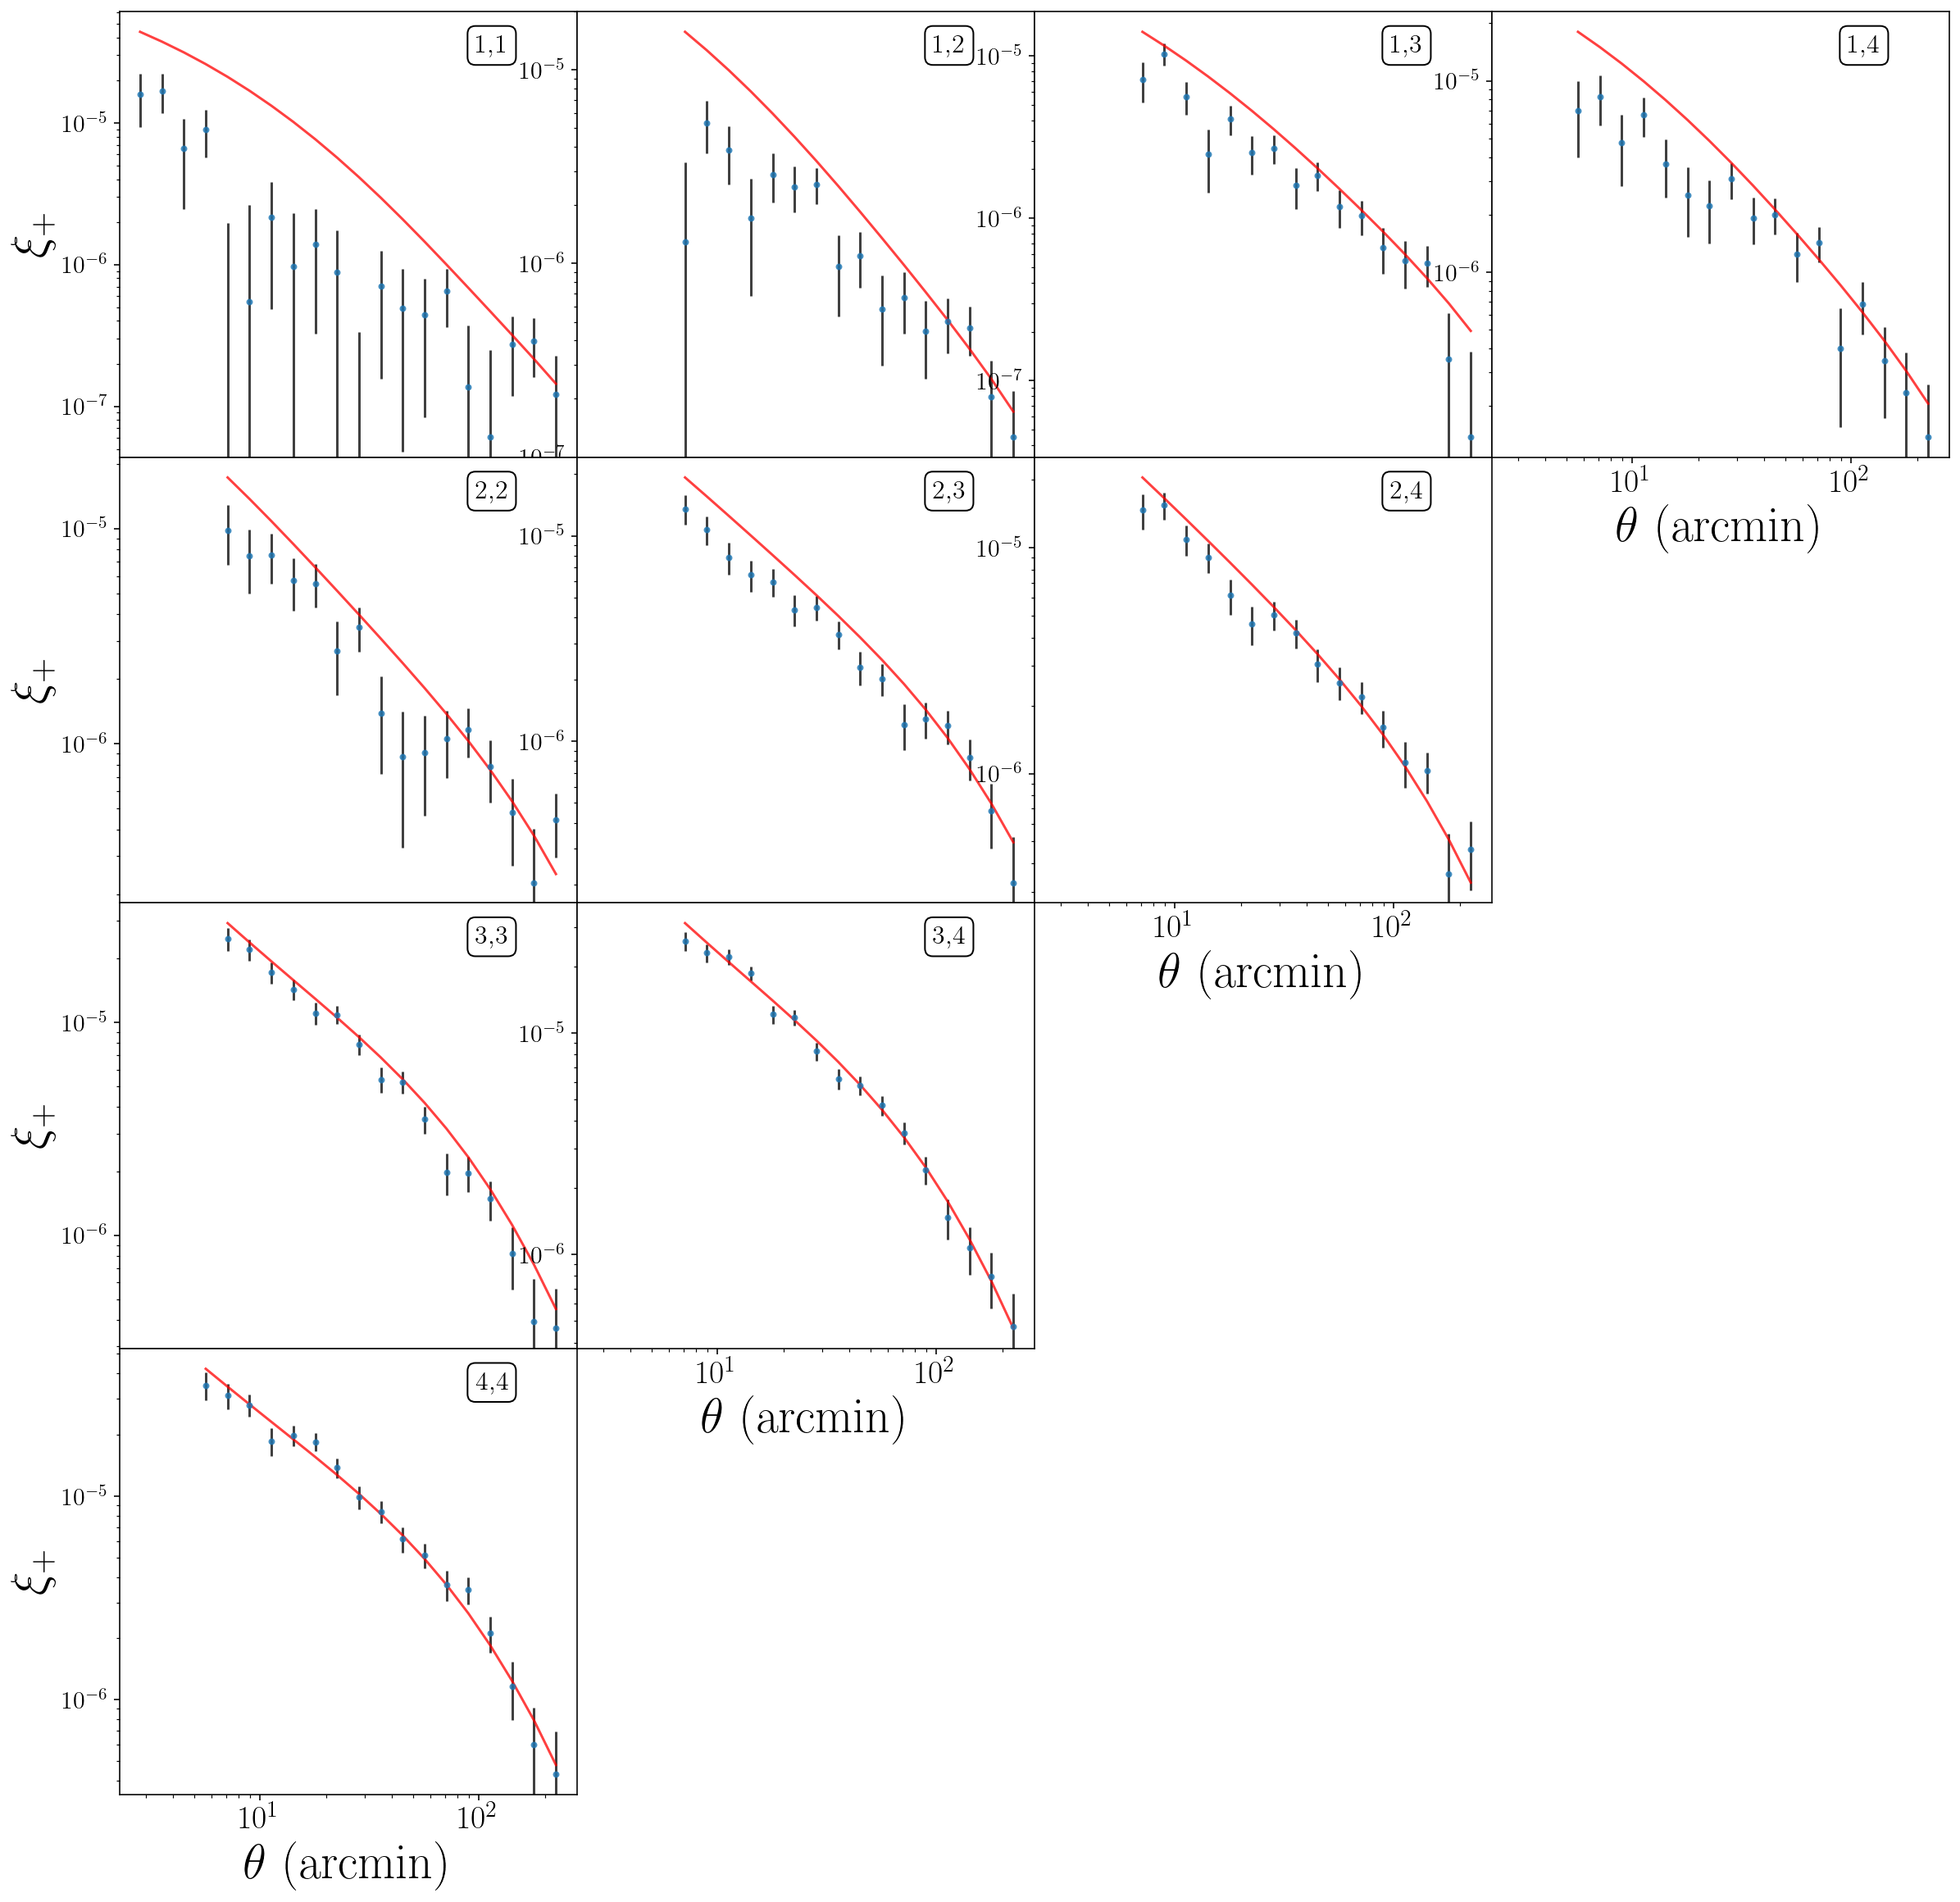

<Figure size 1440x1440 with 0 Axes>

In [33]:
# Matplotlib settings
axislabelfontsize='large'
plt.rcParams["figure.figsize"] = [20.0,20.0]
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "font.size": 20,
    "axes.labelsize": 30,
    "ytick.labelsize": 15,
    
})
axislabelfontsize='large'

figure, axis = plt.subplots(4, 4)

axis[0, 0].set_yscale('log');axis[0, 0].set_xscale('log')
axis[0, 0].errorbar(theta_xi_p_1_1, xi_p_1_1, error_xi_p_1_1, marker='o',ecolor='black',linestyle = '', markersize = 3.00, alpha = 0.75)
axis[0, 0].plot(theta_xi_p_1_1, model_xi_p_1_1, marker='', color='r',linestyle = '-', markersize = 1.00, alpha = 0.75)
axis[0, 0].set_xlabel(r'$\theta$ (arcmin)')
axis[0, 0].set_ylabel(r'$\xi_{+}$')
axis[0, 0].annotate('1,1', xy=(0.85, 0.95), xycoords='axes fraction',
            size=16, ha='right', va='top',
            bbox=dict(boxstyle='round', fc='w'))

axis[0, 1].set_yscale('log');axis[0, 1].set_xscale('log')
axis[0, 1].errorbar(theta_xi_p_1_2, xi_p_1_2, error_xi_p_1_2, marker='o',ecolor='black',linestyle = '', markersize = 3.00, alpha = 0.75)
axis[0, 1].plot(theta_xi_p_1_2, model_xi_p_1_2, marker='', color='r',linestyle = '-', markersize = 1.00, alpha = 0.75)
axis[0, 1].set_xlabel(r'$\theta$ (arcmin)')
axis[0, 1].annotate('1,2', xy=(0.85, 0.95), xycoords='axes fraction',
            size=16, ha='right', va='top',
            bbox=dict(boxstyle='round', fc='w'))

axis[0, 2].set_yscale('log');axis[0, 2].set_xscale('log')
axis[0, 2].errorbar(theta_xi_p_1_3, xi_p_1_3, error_xi_p_1_3, marker='o',ecolor='black',linestyle = '', markersize = 3.00, alpha = 0.75)
axis[0, 2].plot(theta_xi_p_1_3, model_xi_p_1_3, marker='', color='r',linestyle = '-', markersize = 1.00, alpha = 0.75)
axis[0, 2].set_xlabel(r'$\theta$ (arcmin)')
axis[0, 2].annotate('1,3', xy=(0.85, 0.95), xycoords='axes fraction',
            size=16, ha='right', va='top',
            bbox=dict(boxstyle='round', fc='w'))

axis[0, 3].set_yscale('log');axis[0, 3].set_xscale('log')
axis[0, 3].errorbar(theta_xi_p_1_4, xi_p_1_4, error_xi_p_1_4, marker='o',ecolor='black',linestyle = '', markersize = 3.00, alpha = 0.75)
axis[0, 3].plot(theta_xi_p_1_4, model_xi_p_1_4, marker='', color='r',linestyle = '-', markersize = 1.00, alpha = 0.75)
axis[0, 3].set_xlabel(r'$\theta$ (arcmin)')
axis[0, 3].annotate('1,4', xy=(0.85, 0.95), xycoords='axes fraction',
            size=16, ha='right', va='top',
            bbox=dict(boxstyle='round', fc='w'))

axis[1, 0].set_yscale('log');axis[1, 0].set_xscale('log')
axis[1, 0].errorbar(theta_xi_p_2_2, xi_p_2_2, error_xi_p_2_2, marker='o',ecolor='black',linestyle = '', markersize = 3.00, alpha = 0.75)
axis[1, 0].plot(theta_xi_p_2_2, model_xi_p_2_2, marker='', color='r',linestyle = '-', markersize = 1.00, alpha = 0.75)
axis[1, 0].set_xlabel(r'$\theta$ (arcmin)')
axis[1, 0].set_ylabel(r'$\xi_{+}$')
axis[1, 0].annotate('2,2', xy=(0.85, 0.95), xycoords='axes fraction',
            size=16, ha='right', va='top',
            bbox=dict(boxstyle='round', fc='w'))

axis[1, 1].set_yscale('log');axis[1, 1].set_xscale('log')
axis[1, 1].errorbar(theta_xi_p_2_3, xi_p_2_3, error_xi_p_2_3, marker='o',ecolor='black',linestyle = '', markersize = 3.00, alpha = 0.75)
axis[1, 1].plot(theta_xi_p_2_3, model_xi_p_2_3, marker='', color='r',linestyle = '-', markersize = 1.00, alpha = 0.75)
axis[1, 1].set_xlabel(r'$\theta$ (arcmin)')
axis[1, 1].annotate('2,3', xy=(0.85, 0.95), xycoords='axes fraction',
            size=16, ha='right', va='top',
            bbox=dict(boxstyle='round', fc='w'))

axis[1, 2].set_yscale('log');axis[1, 2].set_xscale('log')
axis[1, 2].errorbar(theta_xi_p_2_4, xi_p_2_4, error_xi_p_2_4, marker='o',ecolor='black',linestyle = '', markersize = 3.00, alpha = 0.75)
axis[1, 2].plot(theta_xi_p_2_4, model_xi_p_2_4, marker='', color='r',linestyle = '-', markersize = 1.00, alpha = 0.75)
axis[1, 2].set_xlabel(r'$\theta$ (arcmin)')
axis[1, 2].annotate('2,4', xy=(0.85, 0.95), xycoords='axes fraction',
            size=16, ha='right', va='top',
            bbox=dict(boxstyle='round', fc='w'))

axis[1, 3].axis('off')

axis[2, 0].set_yscale('log');axis[2, 0].set_xscale('log')
axis[2, 0].errorbar(theta_xi_p_3_3, xi_p_3_3, error_xi_p_3_3, marker='o',ecolor='black',linestyle = '', markersize = 3.00, alpha = 0.75)
axis[2, 0].plot(theta_xi_p_3_3, model_xi_p_3_3, marker='', color='r',linestyle = '-', markersize = 1.00, alpha = 0.75)
axis[2, 0].set_xlabel('theta')
axis[2, 0].set_ylabel(r'$\xi_{+}$')
axis[2, 0].annotate('3,3', xy=(0.85, 0.95), xycoords='axes fraction',
            size=16, ha='right', va='top',
            bbox=dict(boxstyle='round', fc='w'))

axis[2, 1].set_yscale('log');axis[2, 1].set_xscale('log')
axis[2, 1].errorbar(theta_xi_p_3_4, xi_p_3_4, error_xi_p_3_4, marker='o',ecolor='black',linestyle = '', markersize = 3.00, alpha = 0.75)
axis[2, 1].plot(theta_xi_p_3_4, model_xi_p_3_4, marker='', color='r',linestyle = '-', markersize = 1.00, alpha = 0.75)
axis[2, 1].set_xlabel(r'$\theta$ (arcmin)')
axis[2, 1].annotate('3,4', xy=(0.85, 0.95), xycoords='axes fraction',
            size=16, ha='right', va='top',
            bbox=dict(boxstyle='round', fc='w'))

axis[2, 2].axis('off')
axis[2, 3].axis('off')

axis[3, 0].set_yscale('log');axis[3, 0].set_xscale('log')
axis[3, 0].errorbar(theta_xi_p_4_4, xi_p_4_4, error_xi_p_4_4, marker='o',ecolor='black',linestyle = '', markersize = 3.00, alpha = 0.75)
axis[3, 0].plot(theta_xi_p_4_4, model_xi_p_4_4, marker='', color='r',linestyle = '-', markersize = 1.00, alpha = 0.75)
axis[3, 0].set_xlabel(r'$\theta$ (arcmin)')
axis[3, 0].set_ylabel(r'$\xi_{+}$')
axis[3, 0].annotate('4,4', xy=(0.85, 0.95), xycoords='axes fraction',
            size=16, ha='right', va='top',
            bbox=dict(boxstyle='round', fc='w'))

axis[3, 1].axis('off')
axis[3, 2].axis('off')
axis[3, 3].axis('off')



# plt.suptitle(r'Cosmic Shear $\xi_+$',fontsize=30)

##chose either of these two
plt.subplots_adjust(hspace=.0, wspace=.0)
#figure.tight_layout()

plt.savefig("xip.pdf")
plt.show()



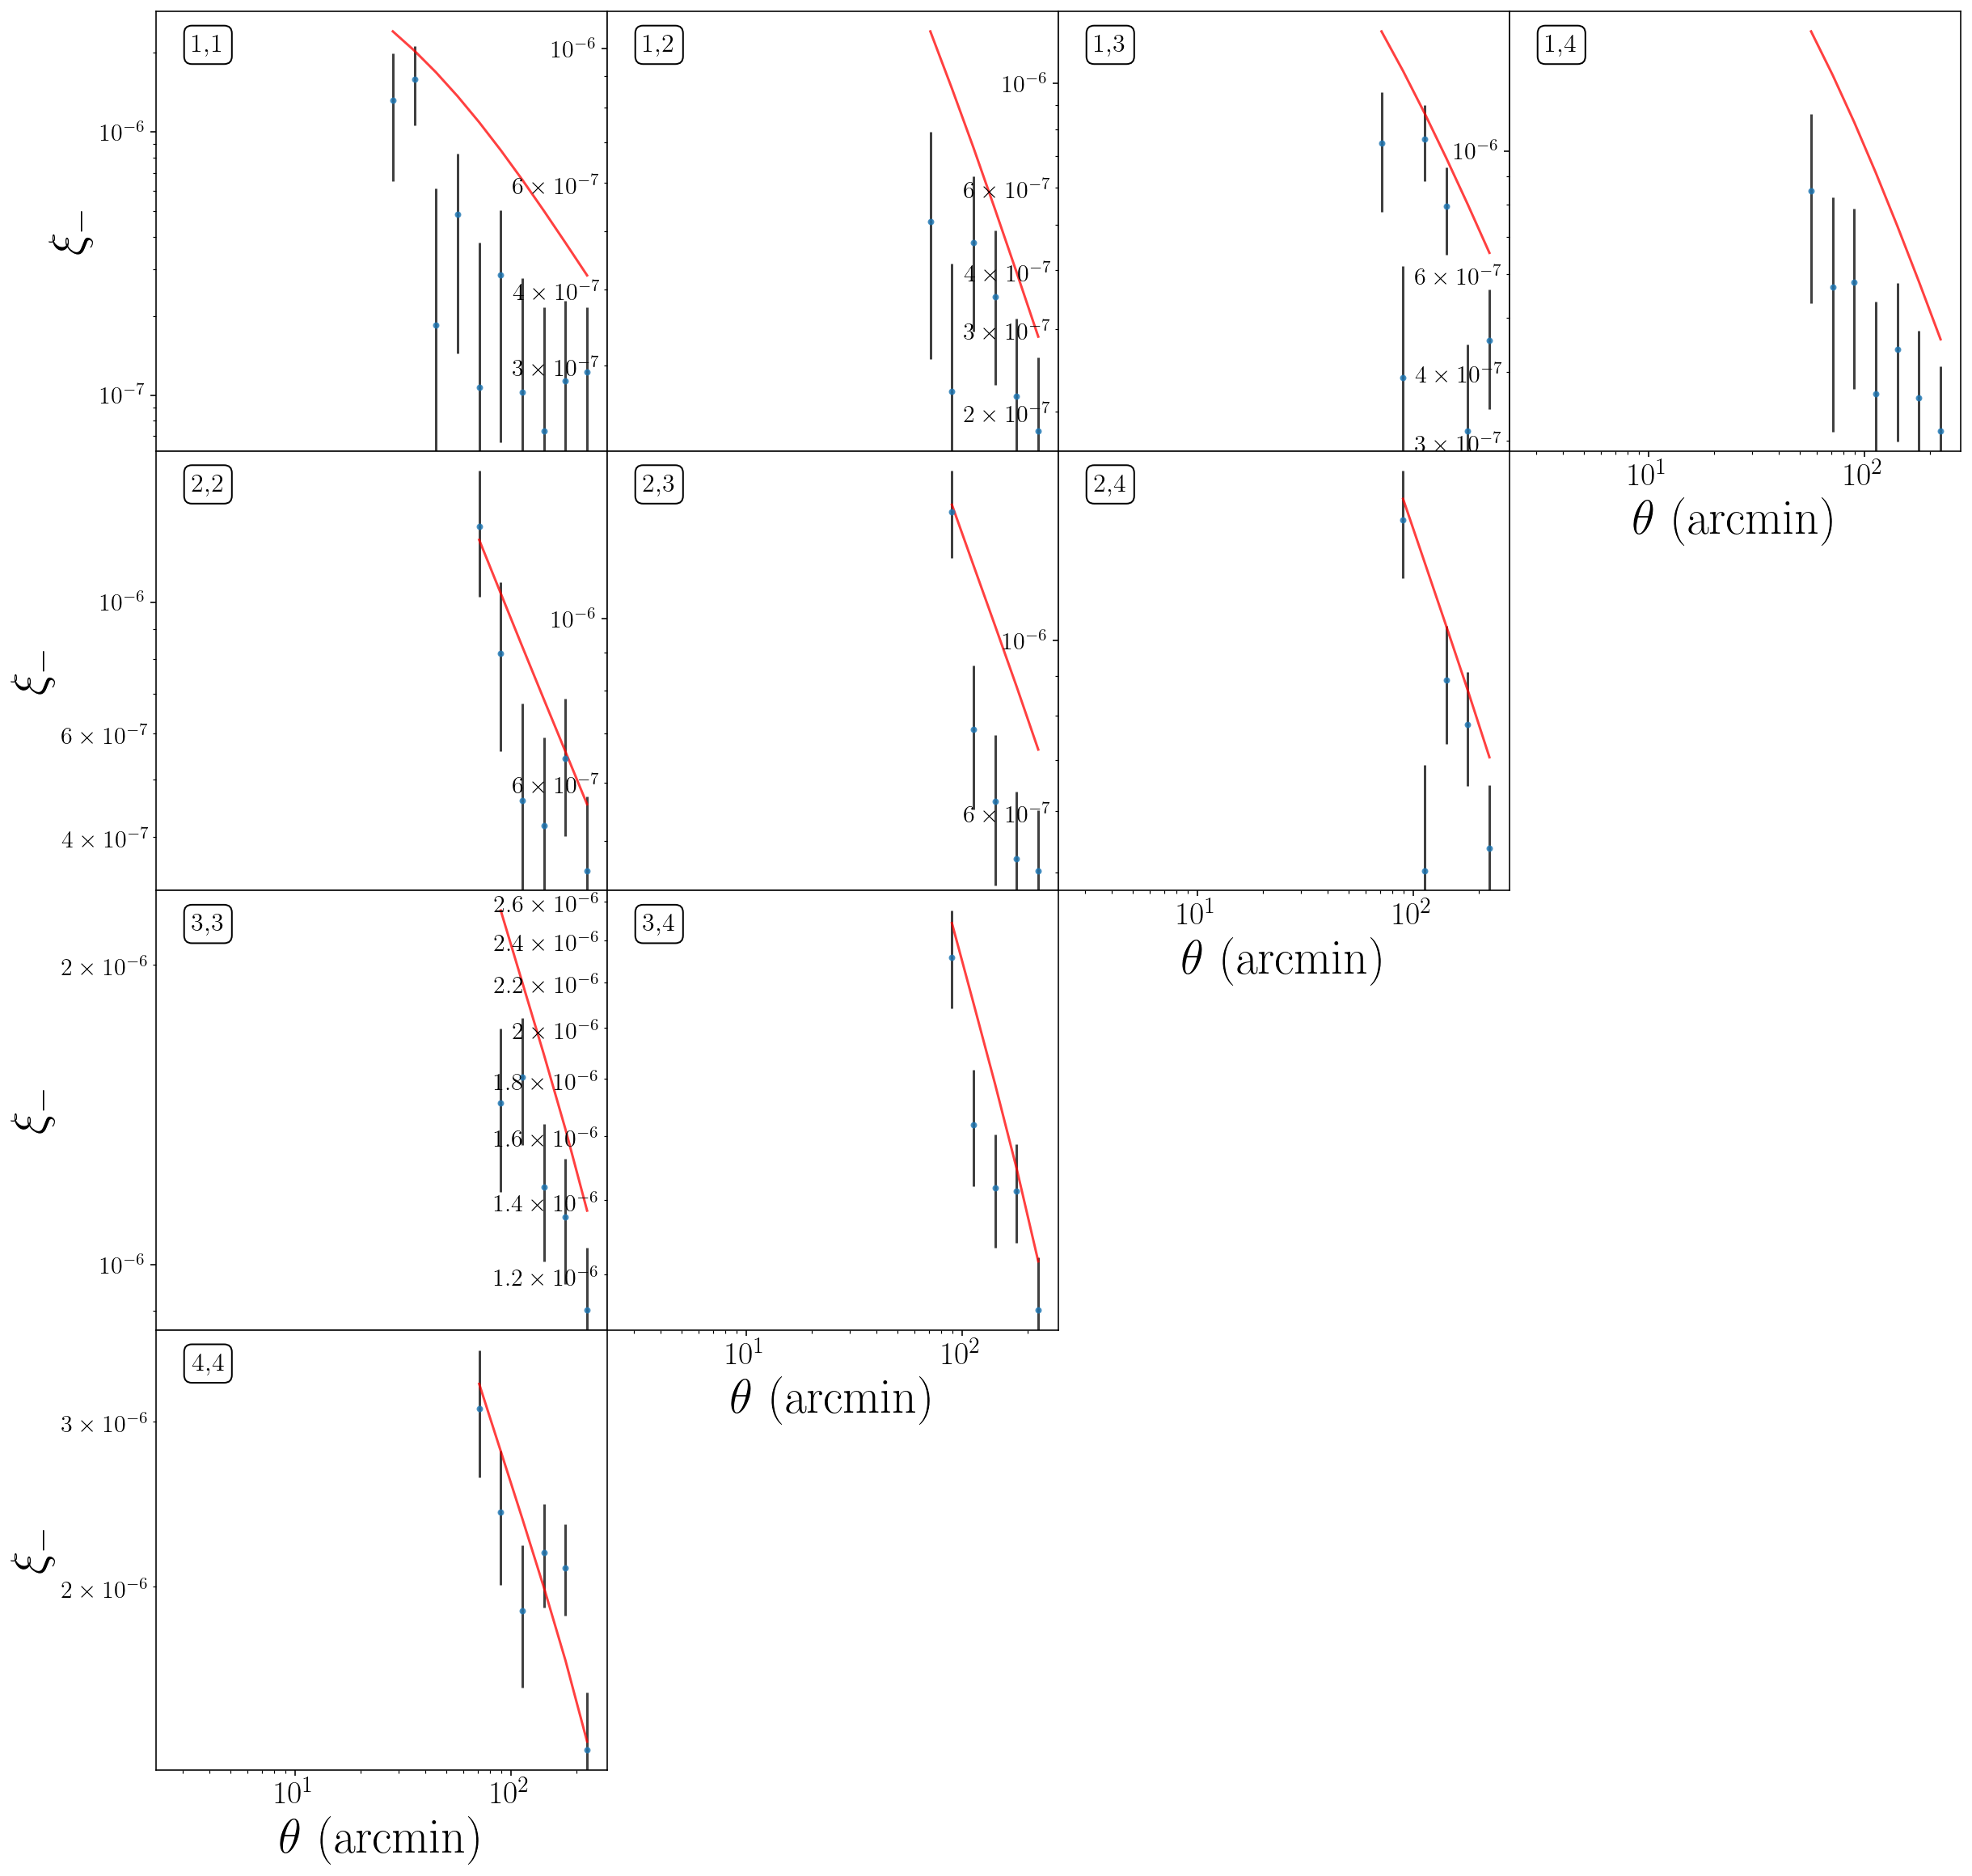

In [39]:
# Matplotlib settings
axislabelfontsize='large'
plt.rcParams["figure.figsize"] = [20.0,20.0]
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "font.size": 20,
    "axes.labelsize": 30,
    "ytick.labelsize": 15,
    
})
axislabelfontsize='large'

figure, axis = plt.subplots(4, 4)

axis[0, 0].set_yscale('log');axis[0, 0].set_xscale('log')
axis[0, 0].errorbar(theta_xi_m_1_1, xi_m_1_1, error_xi_m_1_1, marker='o',ecolor='black',linestyle = '', markersize = 3.00, alpha = 0.75)
axis[0, 0].plot(theta_xi_m_1_1, model_xi_m_1_1, marker='', color='r',linestyle = '-', markersize = 1.00, alpha = 0.75, label = '1,1')
axis[0, 0].set_xlabel(r'$\theta$ (arcmin)')
axis[0, 0].set_ylabel(r'$\xi_{-}$')
axis[0, 0].annotate('1,1', xy=(0.15, 0.95), xycoords='axes fraction',
            size=16, ha='right', va='top',
            bbox=dict(boxstyle='round', fc='w'))

axis[0, 1].set_yscale('log');axis[0, 1].set_xscale('log')
axis[0, 1].errorbar(theta_xi_m_1_2, xi_m_1_2, error_xi_m_1_2, marker='o',ecolor='black',linestyle = '', markersize = 3.00, alpha = 0.75)
axis[0, 1].plot(theta_xi_m_1_2, model_xi_m_1_2, marker='', color='r',linestyle = '-', markersize = 1.00, alpha = 0.75)
axis[0, 1].set_xlabel(r'$\theta$ (arcmin)')
axis[0, 1].annotate('1,2', xy=(0.15, 0.95), xycoords='axes fraction',
            size=16, ha='right', va='top',
            bbox=dict(boxstyle='round', fc='w'))

axis[0, 2].set_yscale('log');axis[0, 2].set_xscale('log')
axis[0, 2].errorbar(theta_xi_m_1_3, xi_m_1_3, error_xi_m_1_3, marker='o',ecolor='black',linestyle = '', markersize = 3.00, alpha = 0.75)
axis[0, 2].plot(theta_xi_m_1_3, model_xi_m_1_3, marker='', color='r',linestyle = '-', markersize = 1.00, alpha = 0.75)
axis[0, 2].set_xlabel(r'$\theta$ (arcmin)')
axis[0, 2].annotate('1,3', xy=(0.15, 0.95), xycoords='axes fraction',
            size=16, ha='right', va='top',
            bbox=dict(boxstyle='round', fc='w'))

axis[0, 3].set_yscale('log');axis[0, 3].set_xscale('log')
axis[0, 3].errorbar(theta_xi_m_1_4, xi_m_1_4, error_xi_m_1_4, marker='o',ecolor='black',linestyle = '', markersize = 3.00, alpha = 0.75)
axis[0, 3].plot(theta_xi_m_1_4, model_xi_m_1_4, marker='', color='r',linestyle = '-', markersize = 1.00, alpha = 0.75)
axis[0, 3].set_xlabel(r'$\theta$ (arcmin)')
axis[0, 3].annotate('1,4', xy=(0.15, 0.95), xycoords='axes fraction',
            size=16, ha='right', va='top',
            bbox=dict(boxstyle='round', fc='w'))

axis[1, 0].set_yscale('log');axis[1, 0].set_xscale('log')
axis[1, 0].errorbar(theta_xi_m_2_2, xi_m_2_2, error_xi_m_2_2, marker='o',ecolor='black',linestyle = '', markersize = 3.00, alpha = 0.75)
axis[1, 0].plot(theta_xi_m_2_2, model_xi_m_2_2, marker='', color='r',linestyle = '-', markersize = 1.00, alpha = 0.75)
axis[1, 0].set_xlabel(r'$\theta$ (arcmin)')
axis[1, 0].set_ylabel(r'$\xi_{-}$')
axis[1, 0].annotate('2,2', xy=(0.15, 0.95), xycoords='axes fraction',
            size=16, ha='right', va='top',
            bbox=dict(boxstyle='round', fc='w'))

axis[1, 1].set_yscale('log');axis[1, 1].set_xscale('log')
axis[1, 1].errorbar(theta_xi_m_2_3, xi_m_2_3, error_xi_m_2_3, marker='o',ecolor='black',linestyle = '', markersize = 3.00, alpha = 0.75)
axis[1, 1].plot(theta_xi_m_2_3, model_xi_m_2_3, marker='', color='r',linestyle = '-', markersize = 1.00, alpha = 0.75)
axis[1, 1].set_xlabel(r'$\theta$ (arcmin)')
axis[1, 1].annotate('2,3', xy=(0.15, 0.95), xycoords='axes fraction',
            size=16, ha='right', va='top',
            bbox=dict(boxstyle='round', fc='w'))

axis[1, 2].set_yscale('log');axis[1, 2].set_xscale('log')
axis[1, 2].errorbar(theta_xi_m_2_4, xi_m_2_4, error_xi_m_2_4, marker='o',ecolor='black',linestyle = '', markersize = 3.00, alpha = 0.75)
axis[1, 2].plot(theta_xi_m_2_4, model_xi_m_2_4, marker='', color='r',linestyle = '-', markersize = 1.00, alpha = 0.75)
axis[1, 2].set_xlabel(r'$\theta$ (arcmin)')
axis[1, 2].annotate('2,4', xy=(0.15, 0.95), xycoords='axes fraction',
            size=16, ha='right', va='top',
            bbox=dict(boxstyle='round', fc='w'))

axis[1, 3].axis('off')

axis[2, 0].set_yscale('log');axis[2, 0].set_xscale('log')
axis[2, 0].errorbar(theta_xi_m_3_3, xi_m_3_3, error_xi_m_3_3, marker='o',ecolor='black',linestyle = '', markersize = 3.00, alpha = 0.75)
axis[2, 0].plot(theta_xi_m_3_3, model_xi_m_3_3, marker='', color='r',linestyle = '-', markersize = 1.00, alpha = 0.75)
axis[2, 0].set_xlabel('theta')
axis[2, 0].set_ylabel(r'$\xi_{-}$')
axis[2, 0].annotate('3,3', xy=(0.15, 0.95), xycoords='axes fraction',
            size=16, ha='right', va='top',
            bbox=dict(boxstyle='round', fc='w'))

axis[2, 1].set_yscale('log');axis[2, 1].set_xscale('log')
axis[2, 1].errorbar(theta_xi_m_3_4, xi_m_3_4, error_xi_m_3_4, marker='o',ecolor='black',linestyle = '', markersize = 3.00, alpha = 0.75)
axis[2, 1].plot(theta_xi_m_3_4, model_xi_m_3_4, marker='', color='r',linestyle = '-', markersize = 1.00, alpha = 0.75)
axis[2, 1].set_xlabel(r'$\theta$ (arcmin)')
axis[2, 1].annotate('3,4', xy=(0.15, 0.95), xycoords='axes fraction',
            size=16, ha='right', va='top',
            bbox=dict(boxstyle='round', fc='w'))

axis[2, 2].axis('off')
axis[2, 3].axis('off')

axis[3, 0].set_yscale('log');axis[3, 0].set_xscale('log')
axis[3, 0].errorbar(theta_xi_m_4_4, xi_m_4_4, error_xi_m_4_4, marker='o',ecolor='black',linestyle = '', markersize = 3.00, alpha = 0.75)
axis[3, 0].plot(theta_xi_m_4_4, model_xi_m_4_4, marker='', color='r',linestyle = '-', markersize = 1.00, alpha = 0.75)
axis[3, 0].set_xlabel(r'$\theta$ (arcmin)')
axis[3, 0].set_ylabel(r'$\xi_{-}$')
axis[3, 0].annotate('4,4', xy=(0.15, 0.95), xycoords='axes fraction',
            size=16, ha='right', va='top',
            bbox=dict(boxstyle='round', fc='w'))

axis[3, 1].axis('off')
axis[3, 2].axis('off')
axis[3, 3].axis('off')



# plt.suptitle(r'Cosmic Shear $\xi_-$',fontsize=30)


##chose either of these two
plt.subplots_adjust(hspace=.0, wspace=.0)
#figure.tight_layout()

plt.savefig("xim.pdf")
plt.show()


In [21]:
#Not very automatic now, better check with the index:   
# hdulist['xip'].data.field('ANGBIN')

theta_gammat = hdulist['gammat'].data.field('ANG')

gammat = hdulist['gammat'].data.field('VALUE') # directly from fits(real data)
gammat = gammat * mask[400:800]
model_gammat = data_vector_1[400:800] # From data-vector(can be model vector)
error_gammat = error[400:800]


theta_gammat_1_1 = theta_gammat[0:20];theta_gammat_1_2 = theta_gammat[20:40];theta_gammat_1_3 = theta_gammat[40:60];theta_gammat_1_4 = theta_gammat[60:80]
theta_gammat_2_1 = theta_gammat[80:100];theta_gammat_2_2 = theta_gammat[100:120];theta_gammat_2_3 = theta_gammat[120:140];theta_gammat_2_4 = theta_gammat[140:160]
theta_gammat_3_1 = theta_gammat[160:180];theta_gammat_3_2 = theta_gammat[180:200];theta_gammat_3_3 = theta_gammat[200:220];theta_gammat_3_4 = theta_gammat[220:240]
theta_gammat_4_1 = theta_gammat[240:260];theta_gammat_4_2 = theta_gammat[260:280];theta_gammat_4_3 = theta_gammat[280:300];theta_gammat_4_4 = theta_gammat[300:320]
theta_gammat_5_1 = theta_gammat[320:340];theta_gammat_5_2 = theta_gammat[340:360];theta_gammat_5_3 = theta_gammat[360:380];theta_gammat_5_4 = theta_gammat[380:400]

gammat_1_1 = gammat[0:20];gammat_1_2 = gammat[20:40];gammat_1_3 = gammat[40:60];gammat_1_4 = gammat[60:80]
gammat_2_1 = gammat[80:100];gammat_2_2 = gammat[100:120];gammat_2_3 = gammat[120:140];gammat_2_4 = gammat[140:160]
gammat_3_1 = gammat[160:180];gammat_3_2 = gammat[180:200];gammat_3_3 = gammat[200:220];gammat_3_4 = gammat[220:240]
gammat_4_1 = gammat[240:260];gammat_4_2 = gammat[260:280];gammat_4_3 = gammat[280:300];gammat_4_4 = gammat[300:320]
gammat_5_1 = gammat[320:340];gammat_5_2 = gammat[340:360];gammat_5_3 = gammat[360:380];gammat_5_4 = gammat[380:400]


model_gammat_1_1 = model_gammat[0:20];model_gammat_1_2 = model_gammat[20:40];model_gammat_1_3 = model_gammat[40:60];model_gammat_1_4 = model_gammat[60:80]
model_gammat_2_1 = model_gammat[80:100];model_gammat_2_2 = model_gammat[100:120];model_gammat_2_3 = model_gammat[120:140];model_gammat_2_4 = model_gammat[140:160]
model_gammat_3_1 = model_gammat[160:180];model_gammat_3_2 = model_gammat[180:200];model_gammat_3_3 = model_gammat[200:220];model_gammat_3_4 = model_gammat[220:240]
model_gammat_4_1 = model_gammat[240:260];model_gammat_4_2 = model_gammat[260:280];model_gammat_4_3 = model_gammat[280:300];model_gammat_4_4 = model_gammat[300:320]
model_gammat_5_1 = model_gammat[320:340];model_gammat_5_2 = model_gammat[340:360];model_gammat_5_3 = model_gammat[360:380];model_gammat_5_4 = model_gammat[380:400]


error_gammat_1_1 = error_gammat[0:20];error_gammat_1_2 = error_gammat[20:40];error_gammat_1_3 = error_gammat[40:60];error_gammat_1_4 = error_gammat[60:80]
error_gammat_2_1 = error_gammat[80:100];error_gammat_2_2 = error_gammat[100:120];error_gammat_2_3 = error_gammat[120:140];error_gammat_2_4 = error_gammat[140:160]
error_gammat_3_1 = error_gammat[160:180];error_gammat_3_2 = error_gammat[180:200];error_gammat_3_3 = error_gammat[200:220];error_gammat_3_4 = error_gammat[220:240]
error_gammat_4_1 = error_gammat[240:260];error_gammat_4_2 = error_gammat[260:280];error_gammat_4_3 = error_gammat[280:300];error_gammat_4_4 = error_gammat[300:320]
error_gammat_5_1 = error_gammat[320:340];error_gammat_5_2 = error_gammat[340:360];error_gammat_5_3 = error_gammat[360:380];error_gammat_5_4 = error_gammat[380:400]

del theta_gammat
del model_gammat
del error_gammat

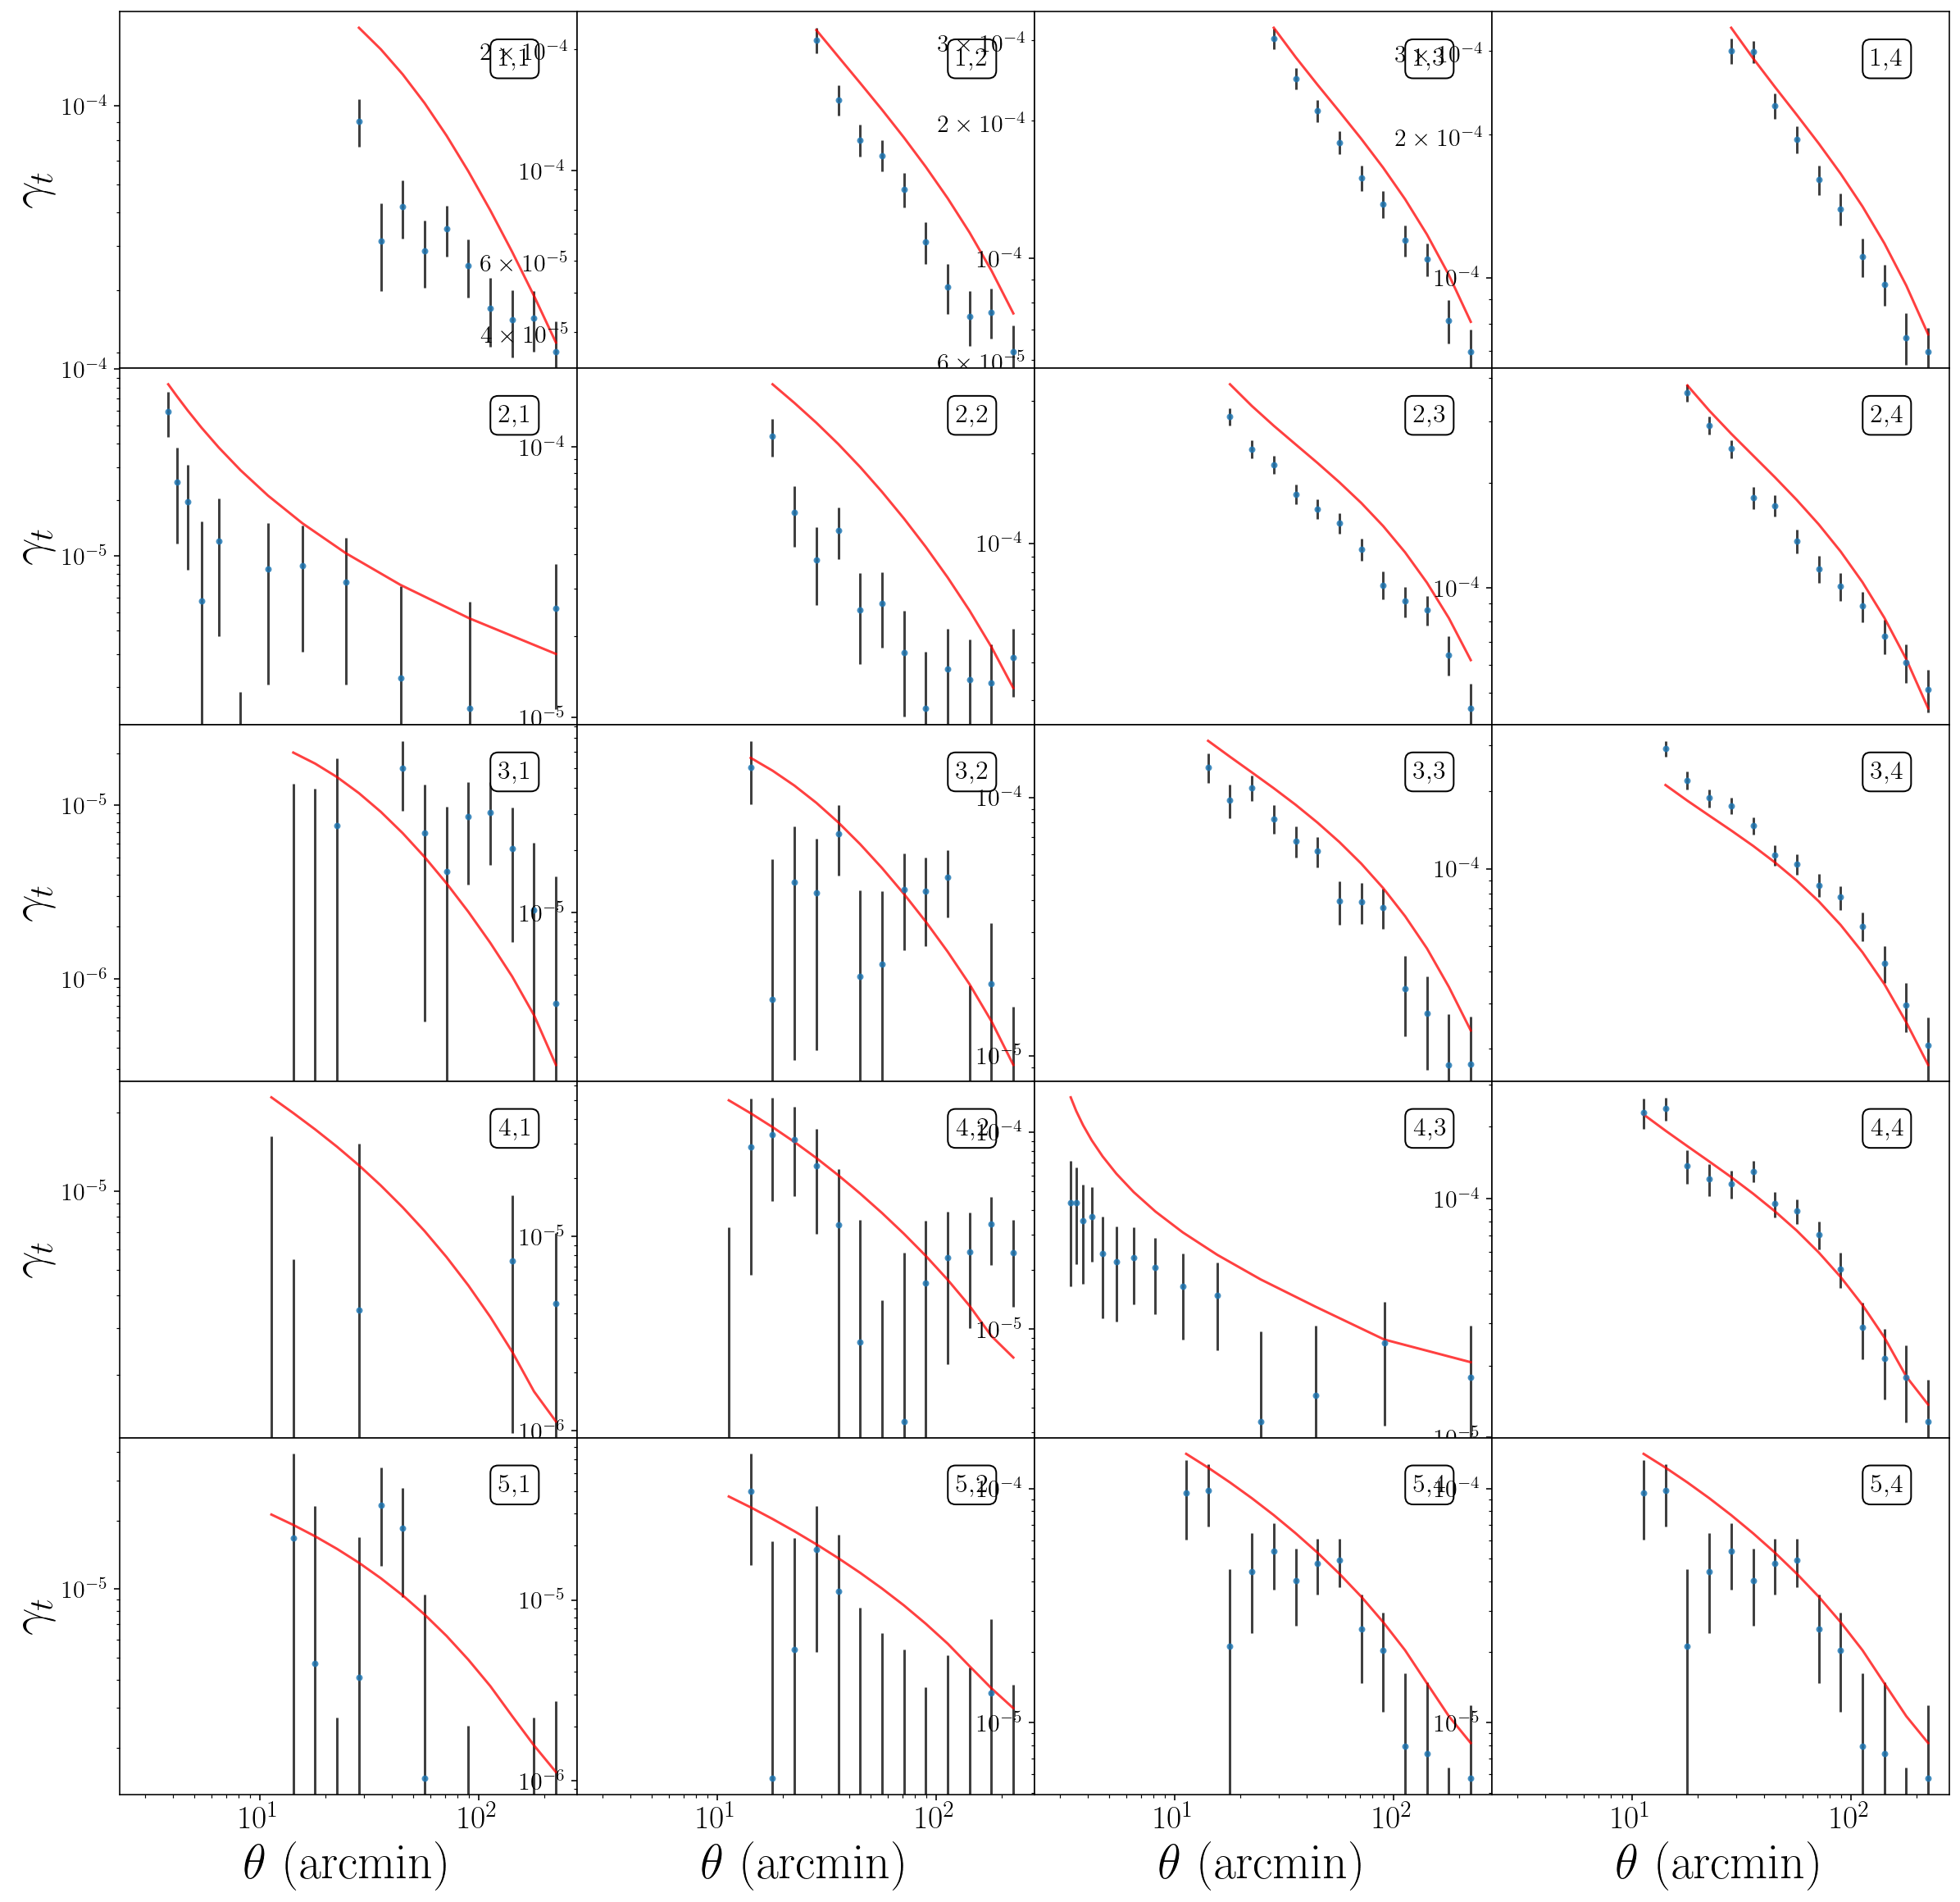

<Figure size 1440x1440 with 0 Axes>

In [38]:
# Matplotlib settings
axislabelfontsize='large'
plt.rcParams["figure.figsize"] = [20.0,20.0]
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "font.size": 20,
    "axes.labelsize": 30,
    "ytick.labelsize": 15,
    
})
axislabelfontsize='large'

figure, axis = plt.subplots(5, 4)

axis[0, 0].set_yscale('log');axis[0, 0].set_xscale('log')
axis[0, 0].errorbar(theta_gammat_1_1, gammat_1_1, error_gammat_1_1, marker='o',ecolor='black',linestyle = '', markersize = 3.00, alpha = 0.75)
axis[0, 0].plot(theta_gammat_1_1, model_gammat_1_1, marker='', color='r',linestyle = '-', markersize = 1.00, alpha = 0.75, label = '1,1')
axis[0, 0].set_xlabel(r'$\theta$ (arcmin)')
axis[0, 0].set_ylabel(r'$\gamma_t$')
axis[0, 0].annotate('1,1', xy=(0.9, 0.9), xycoords='axes fraction',
            size=16, ha='right', va='top',
            bbox=dict(boxstyle='round', fc='w'))

axis[0, 1].set_yscale('log');axis[0, 1].set_xscale('log')
axis[0, 1].errorbar(theta_gammat_1_2, gammat_1_2, error_gammat_1_2, marker='o',ecolor='black',linestyle = '', markersize = 3.00, alpha = 0.75)
axis[0, 1].plot(theta_gammat_1_2, model_gammat_1_2, marker='', color='r',linestyle = '-', markersize = 1.00, alpha = 0.75)
axis[0, 1].set_xlabel(r'$\theta$ (arcmin)')
axis[0, 1].annotate('1,2', xy=(0.9, 0.9), xycoords='axes fraction',
            size=16, ha='right', va='top',
            bbox=dict(boxstyle='round', fc='w'))

axis[0, 2].set_yscale('log');axis[0, 2].set_xscale('log')
axis[0, 2].errorbar(theta_gammat_1_3, gammat_1_3, error_gammat_1_3, marker='o',ecolor='black',linestyle = '', markersize = 3.00, alpha = 0.75)
axis[0, 2].plot(theta_gammat_1_3, model_gammat_1_3, marker='', color='r',linestyle = '-', markersize = 1.00, alpha = 0.75)
axis[0, 2].set_xlabel(r'$\theta$ (arcmin)')
axis[0, 2].annotate('1,3', xy=(0.9, 0.9), xycoords='axes fraction',
            size=16, ha='right', va='top',
            bbox=dict(boxstyle='round', fc='w'))

axis[0, 3].set_yscale('log');axis[0, 3].set_xscale('log')
axis[0, 3].errorbar(theta_gammat_1_4, gammat_1_4, error_gammat_1_4, marker='o',ecolor='black',linestyle = '', markersize = 3.00, alpha = 0.75)
axis[0, 3].plot(theta_gammat_1_4, model_gammat_1_4, marker='', color='r',linestyle = '-', markersize = 1.00, alpha = 0.75)
axis[0, 3].set_xlabel(r'$\theta$ (arcmin)')
axis[0, 3].annotate('1,4', xy=(0.9, 0.9), xycoords='axes fraction',
            size=16, ha='right', va='top',
            bbox=dict(boxstyle='round', fc='w'))


axis[1, 0].set_yscale('log');axis[0, 0].set_xscale('log')
axis[1, 0].errorbar(theta_gammat_2_1, gammat_2_1, error_gammat_2_1, marker='o',ecolor='black',linestyle = '', markersize = 3.00, alpha = 0.75)
axis[1, 0].plot(theta_gammat_2_1, model_gammat_2_1, marker='', color='r',linestyle = '-', markersize = 1.00, alpha = 0.75, label = '1,1')
axis[1, 0].set_xlabel(r'$\theta$ (arcmin)')
axis[1, 0].set_ylabel(r'$\gamma_t$')
axis[1, 0].annotate('2,1', xy=(0.9, 0.9), xycoords='axes fraction',
            size=16, ha='right', va='top',
            bbox=dict(boxstyle='round', fc='w'))

axis[1, 1].set_yscale('log');axis[1, 1].set_xscale('log')
axis[1, 1].errorbar(theta_gammat_2_2, gammat_2_2, error_gammat_2_2, marker='o',ecolor='black',linestyle = '', markersize = 3.00, alpha = 0.75)
axis[1, 1].plot(theta_gammat_2_2, model_gammat_2_2, marker='', color='r',linestyle = '-', markersize = 1.00, alpha = 0.75)
axis[1, 1].set_xlabel(r'$\theta$ (arcmin)')
axis[1, 1].annotate('2,2', xy=(0.9, 0.9), xycoords='axes fraction',
            size=16, ha='right', va='top',
            bbox=dict(boxstyle='round', fc='w'))

axis[1, 2].set_yscale('log');axis[1, 2].set_xscale('log')
axis[1, 2].errorbar(theta_gammat_2_3, gammat_2_3, error_gammat_2_3, marker='o',ecolor='black',linestyle = '', markersize = 3.00, alpha = 0.75)
axis[1, 2].plot(theta_gammat_2_3, model_gammat_2_3, marker='', color='r',linestyle = '-', markersize = 1.00, alpha = 0.75)
axis[1, 2].set_xlabel(r'$\theta$ (arcmin)')
axis[1, 2].annotate('2,3', xy=(0.9, 0.9), xycoords='axes fraction',
            size=16, ha='right', va='top',
            bbox=dict(boxstyle='round', fc='w'))

axis[1, 3].set_yscale('log');axis[1, 3].set_xscale('log')
axis[1, 3].errorbar(theta_gammat_2_4, gammat_2_4, error_gammat_2_4, marker='o',ecolor='black',linestyle = '', markersize = 3.00, alpha = 0.75)
axis[1, 3].plot(theta_gammat_2_4, model_gammat_2_4, marker='', color='r',linestyle = '-', markersize = 1.00, alpha = 0.75)
axis[1, 3].set_xlabel(r'$\theta$ (arcmin)')
axis[1, 3].annotate('2,4', xy=(0.9, 0.9), xycoords='axes fraction',
            size=16, ha='right', va='top',
            bbox=dict(boxstyle='round', fc='w'))


axis[2, 0].set_yscale('log');axis[2, 0].set_xscale('log')
axis[2, 0].errorbar(theta_gammat_3_1, gammat_3_1, error_gammat_3_1, marker='o',ecolor='black',linestyle = '', markersize = 3.00, alpha = 0.75)
axis[2, 0].plot(theta_gammat_3_1, model_gammat_3_1, marker='', color='r',linestyle = '-', markersize = 1.00, alpha = 0.75)
axis[2, 0].set_xlabel('theta')
axis[2, 0].set_ylabel(r'$\gamma_t$')
axis[2, 0].annotate('3,1', xy=(0.9, 0.9), xycoords='axes fraction',
            size=16, ha='right', va='top',
            bbox=dict(boxstyle='round', fc='w'))

axis[2, 1].set_yscale('log');axis[2, 1].set_xscale('log')
axis[2, 1].errorbar(theta_gammat_3_2, gammat_3_2, error_gammat_3_2, marker='o',ecolor='black',linestyle = '', markersize = 3.00, alpha = 0.75)
axis[2, 1].plot(theta_gammat_3_2, model_gammat_3_2, marker='', color='r',linestyle = '-', markersize = 1.00, alpha = 0.75)
axis[2, 1].set_xlabel(r'$\theta$ (arcmin)')
axis[2, 1].annotate('3,2', xy=(0.9, 0.9), xycoords='axes fraction',
            size=16, ha='right', va='top',
            bbox=dict(boxstyle='round', fc='w'))

axis[2, 2].set_yscale('log');axis[2, 2].set_xscale('log')
axis[2, 2].errorbar(theta_gammat_3_3, gammat_3_3, error_gammat_3_3, marker='o',ecolor='black',linestyle = '', markersize = 3.00, alpha = 0.75)
axis[2, 2].plot(theta_gammat_3_3, model_gammat_3_3, marker='', color='r',linestyle = '-', markersize = 1.00, alpha = 0.75)
axis[2, 2].set_xlabel(r'$\theta$ (arcmin)')
axis[2, 2].annotate('3,3', xy=(0.9, 0.9), xycoords='axes fraction',
            size=16, ha='right', va='top',
            bbox=dict(boxstyle='round', fc='w'))

axis[2, 3].set_yscale('log');axis[2, 3].set_xscale('log')
axis[2, 3].errorbar(theta_gammat_3_4, gammat_3_4, error_gammat_3_4, marker='o',ecolor='black',linestyle = '', markersize = 3.00, alpha = 0.75)
axis[2, 3].plot(theta_gammat_3_4, model_gammat_3_4, marker='', color='r',linestyle = '-', markersize = 1.00, alpha = 0.75)
axis[2, 3].set_xlabel(r'$\theta$ (arcmin)')
axis[2, 3].annotate('3,4', xy=(0.9, 0.9), xycoords='axes fraction',
            size=16, ha='right', va='top',
            bbox=dict(boxstyle='round', fc='w'))

axis[3, 0].set_yscale('log');axis[3, 0].set_xscale('log')
axis[3, 0].errorbar(theta_gammat_4_1, gammat_4_1, error_gammat_4_1, marker='o',ecolor='black',linestyle = '', markersize = 3.00, alpha = 0.75)
axis[3, 0].plot(theta_gammat_4_1, model_gammat_4_1, marker='', color='r',linestyle = '-', markersize = 1.00, alpha = 0.75)
axis[3, 0].set_xlabel(r'$\theta$ (arcmin)')
axis[3, 0].set_ylabel(r'$\gamma_t$')
axis[3, 0].annotate('4,1', xy=(0.9, 0.9), xycoords='axes fraction',
            size=16, ha='right', va='top',
            bbox=dict(boxstyle='round', fc='w'))

axis[3, 1].set_yscale('log');axis[3, 1].set_xscale('log')
axis[3, 1].errorbar(theta_gammat_4_2, gammat_4_2, error_gammat_4_2, marker='o',ecolor='black',linestyle = '', markersize = 3.00, alpha = 0.75)
axis[3, 1].plot(theta_gammat_4_2, model_gammat_4_2, marker='', color='r',linestyle = '-', markersize = 1.00, alpha = 0.75)
axis[3, 1].set_xlabel(r'$\theta$ (arcmin)')
axis[3, 1].annotate('4,2', xy=(0.9, 0.9), xycoords='axes fraction',
            size=16, ha='right', va='top',
            bbox=dict(boxstyle='round', fc='w'))

axis[3, 2].set_yscale('log');axis[3, 3].set_xscale('log')
axis[3, 2].errorbar(theta_gammat_4_3, gammat_4_3, error_gammat_4_3, marker='o',ecolor='black',linestyle = '', markersize = 3.00, alpha = 0.75)
axis[3, 2].plot(theta_gammat_4_3, model_gammat_4_3, marker='', color='r',linestyle = '-', markersize = 1.00, alpha = 0.75)
axis[3, 2].set_xlabel(r'$\theta$ (arcmin)')
axis[3, 2].annotate('4,3', xy=(0.9, 0.9), xycoords='axes fraction',
            size=16, ha='right', va='top',
            bbox=dict(boxstyle='round', fc='w'))


axis[3, 3].set_yscale('log');axis[3, 3].set_xscale('log')
axis[3, 3].errorbar(theta_gammat_4_4, gammat_4_4, error_gammat_4_4, marker='o',ecolor='black',linestyle = '', markersize = 3.00, alpha = 0.75)
axis[3, 3].plot(theta_gammat_4_4, model_gammat_4_4, marker='', color='r',linestyle = '-', markersize = 1.00, alpha = 0.75)
axis[3, 3].set_xlabel(r'$\theta$ (arcmin)')
axis[3, 3].annotate('4,4', xy=(0.9, 0.9), xycoords='axes fraction',
            size=16, ha='right', va='top',
            bbox=dict(boxstyle='round', fc='w'))


axis[4, 0].set_yscale('log');axis[4, 0].set_xscale('log')
axis[4, 0].errorbar(theta_gammat_5_1, gammat_5_1, error_gammat_5_1, marker='o',ecolor='black',linestyle = '', markersize = 3.00, alpha = 0.75)
axis[4, 0].plot(theta_gammat_5_1, model_gammat_5_1, marker='', color='r',linestyle = '-', markersize = 1.00, alpha = 0.75)
axis[4, 0].set_xlabel(r'$\theta$ (arcmin)')
axis[4, 0].set_ylabel(r'$\gamma_t$')
axis[4, 0].annotate('5,1', xy=(0.9, 0.9), xycoords='axes fraction',
            size=16, ha='right', va='top',
            bbox=dict(boxstyle='round', fc='w'))

axis[4, 1].set_yscale('log');axis[4, 1].set_xscale('log')
axis[4, 1].errorbar(theta_gammat_5_2, gammat_5_2, error_gammat_5_2, marker='o',ecolor='black',linestyle = '', markersize = 3.00, alpha = 0.75)
axis[4, 1].plot(theta_gammat_5_2, model_gammat_5_2, marker='', color='r',linestyle = '-', markersize = 1.00, alpha = 0.75)
axis[4, 1].set_xlabel(r'$\theta$ (arcmin)')
axis[4, 1].annotate('5,2', xy=(0.9, 0.9), xycoords='axes fraction',
            size=16, ha='right', va='top',
            bbox=dict(boxstyle='round', fc='w'))


axis[4, 2].set_yscale('log');axis[4, 2].set_xscale('log')
axis[4, 2].errorbar(theta_gammat_5_4, gammat_5_4, error_gammat_5_4, marker='o',ecolor='black',linestyle = '', markersize = 3.00, alpha = 0.75)
axis[4, 2].plot(theta_gammat_5_4, model_gammat_5_4, marker='', color='r',linestyle = '-', markersize = 1.00, alpha = 0.75)
axis[4, 2].set_xlabel(r'$\theta$ (arcmin)')
axis[4, 2].annotate('5,4', xy=(0.9, 0.9), xycoords='axes fraction',
            size=16, ha='right', va='top',
            bbox=dict(boxstyle='round', fc='w'))


axis[4, 3].set_yscale('log');axis[4, 3].set_xscale('log')
axis[4, 3].errorbar(theta_gammat_5_4, gammat_5_4, error_gammat_5_4, marker='o',ecolor='black',linestyle = '', markersize = 3.00, alpha = 0.75)
axis[4, 3].plot(theta_gammat_5_4, model_gammat_5_4, marker='', color='r',linestyle = '-', markersize = 1.00, alpha = 0.75)
axis[4, 3].set_xlabel(r'$\theta$ (arcmin)')
axis[4, 3].annotate('5,4', xy=(0.9, 0.9), xycoords='axes fraction',
            size=16, ha='right', va='top',
            bbox=dict(boxstyle='round', fc='w'))


##chose either of these two
plt.subplots_adjust(hspace=.0, wspace = .0)
#figure.tight_layout()


# plt.suptitle(r'Cosmic Shear $\xi_-$',fontsize=30)

plt.savefig("gammat.pdf")
plt.show()



In [23]:
#Not very automatic now, better check with the index:   
# hdulist['xip'].data.field('ANGBIN')

theta_wtheta = hdulist['wtheta'].data.field('ANG')

wtheta = hdulist['wtheta'].data.field('VALUE') # directly from fits(real data)
wtheta = wtheta * mask[800:900]
model_wtheta = data_vector_1[800:900] # From data-vector(can be model vector)
error_wtheta = error[800:900]


theta_wtheta_1_1 = theta_wtheta[0:20];
theta_wtheta_2_2 = theta_wtheta[20:40]
theta_wtheta_3_3 = theta_wtheta[40:60]
theta_wtheta_4_4 = theta_wtheta[60:80]
theta_wtheta_5_5 = theta_wtheta[80:100]

wtheta_1_1 = wtheta[0:20];
wtheta_2_2 = wtheta[20:40]
wtheta_3_3 = wtheta[40:60]
wtheta_4_4 = wtheta[60:80]
wtheta_5_5 = wtheta[80:100]

model_wtheta_1_1 = model_wtheta[0:20];
model_wtheta_2_2 = model_wtheta[20:40]
model_wtheta_3_3 = model_wtheta[40:60]
model_wtheta_4_4 = model_wtheta[60:80]
model_wtheta_5_5 = model_wtheta[80:100]

error_wtheta_1_1 = error_wtheta[0:20];
error_wtheta_2_2 = error_wtheta[20:40]
error_wtheta_3_3 = error_wtheta[40:60]
error_wtheta_4_4 = error_wtheta[60:80]
error_wtheta_5_5 = error_wtheta[80:100]

del theta_wtheta
del model_wtheta
del error_wtheta

<Figure size 1440x360 with 0 Axes>

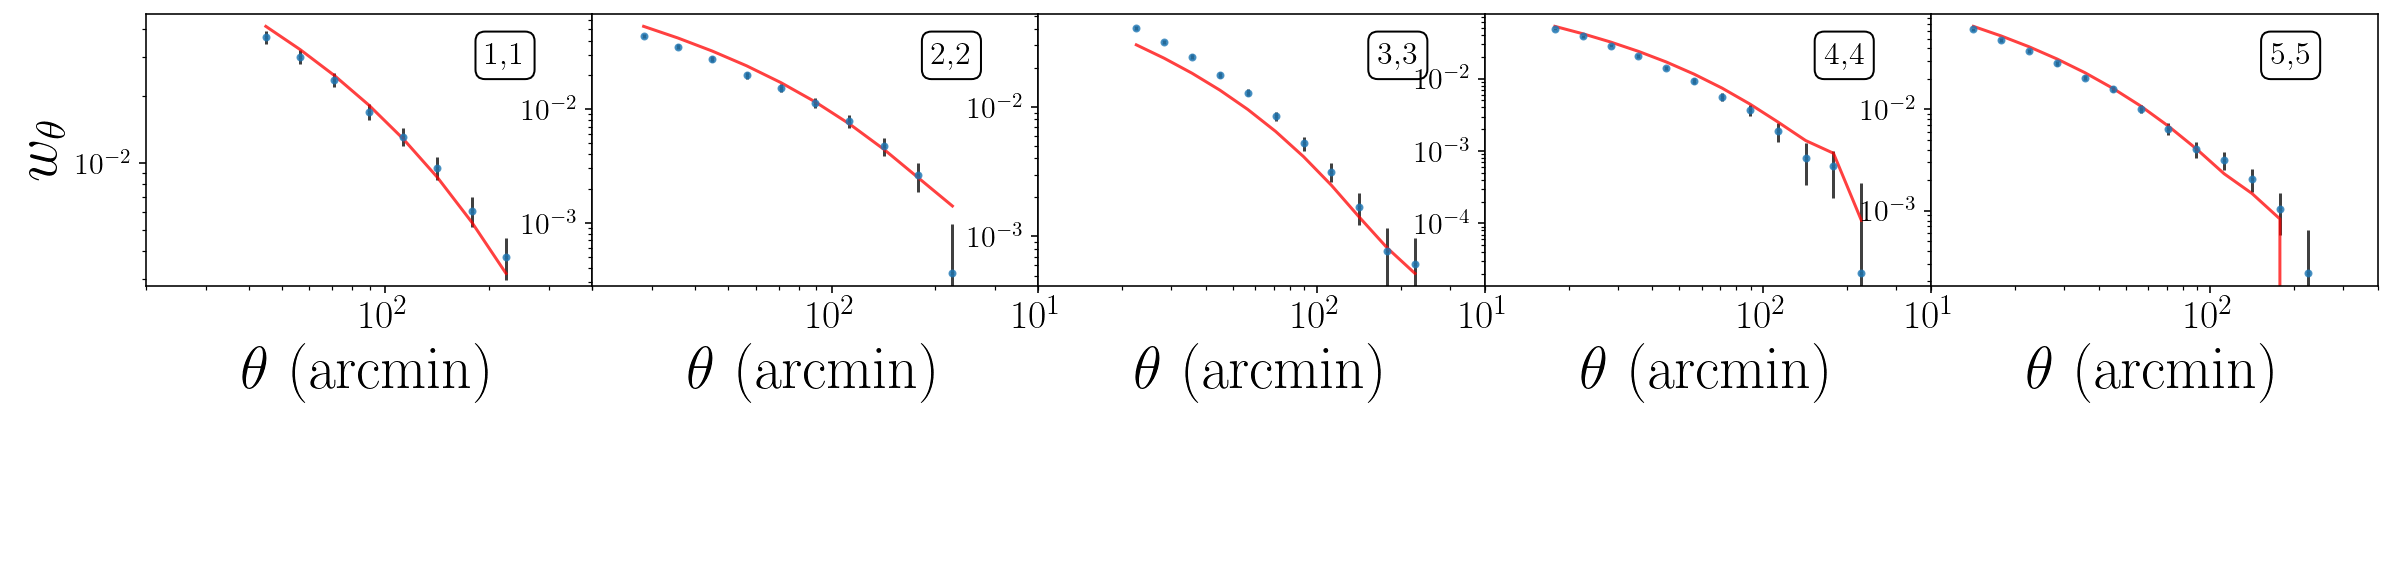

In [61]:
# Matplotlib settings

plt.subplots_adjust(hspace=.0, wspace=.0)
axislabelfontsize='large'
plt.rcParams["figure.figsize"] = [20.0,5.0]
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "font.size": 20,
    "axes.labelsize": 30,
    "ytick.labelsize": 15,
    
})
axislabelfontsize='large'



figure, axis = plt.subplots(2, 5)

axis[0, 0].set_yscale('log');axis[0, 0].set_xscale('log')
axis[0, 0].errorbar(theta_wtheta_1_1, wtheta_1_1, error_wtheta_1_1, marker='o',ecolor='black',linestyle = '', markersize = 3.00, alpha = 0.75)
axis[0, 0].plot(theta_wtheta_1_1, model_wtheta_1_1, marker='', color='r',linestyle = '-', markersize = 1.00, alpha = 0.75, label = '1,1')
axis[0, 0].set_xlabel(r'$\theta$ (arcmin)')
axis[0, 0].set_ylabel(r'$w_{\theta}$')
axis[0, 0].annotate('1,1', xy=(0.85, 0.9), xycoords='axes fraction',
            size=16, ha='right', va='top',
            bbox=dict(boxstyle='round', fc='w'))

axis[0, 1].set_yscale('log');axis[0, 1].set_xscale('log')
axis[0, 1].errorbar(theta_wtheta_2_2, wtheta_2_2, error_wtheta_2_2, marker='o',ecolor='black',linestyle = '', markersize = 3.00, alpha = 0.75)
axis[0, 1].plot(theta_wtheta_2_2, model_wtheta_2_2, marker='', color='r',linestyle = '-', markersize = 1.00, alpha = 0.75)
axis[0, 1].set_xlabel(r'$\theta$ (arcmin)')
axis[0, 1].annotate('2,2', xy=(0.85, 0.9), xycoords='axes fraction',
            size=16, ha='right', va='top',
            bbox=dict(boxstyle='round', fc='w'))

axis[0, 2].set_yscale('log');axis[0, 2].set_xscale('log')
axis[0, 2].errorbar(theta_wtheta_3_3, wtheta_3_3, error_wtheta_3_3, marker='o',ecolor='black',linestyle = '', markersize = 3.00, alpha = 0.75)
axis[0, 2].plot(theta_wtheta_3_3, model_wtheta_3_3, marker='', color='r',linestyle = '-', markersize = 1.00, alpha = 0.75)
axis[0, 2].set_xlabel(r'$\theta$ (arcmin)')
axis[0, 2].annotate('3,3', xy=(0.85, 0.9), xycoords='axes fraction',
            size=16, ha='right', va='top',
            bbox=dict(boxstyle='round', fc='w'))

axis[0, 3].set_yscale('log');axis[0, 3].set_xscale('log')
axis[0, 3].errorbar(theta_wtheta_4_4, wtheta_4_4, error_wtheta_4_4, marker='o',ecolor='black',linestyle = '', markersize = 3.00, alpha = 0.75)
axis[0, 3].plot(theta_wtheta_4_4, model_wtheta_4_4, marker='', color='r',linestyle = '-', markersize = 1.00, alpha = 0.75)
axis[0, 3].set_xlabel(r'$\theta$ (arcmin)')
axis[0, 3].annotate('4,4', xy=(0.85, 0.9), xycoords='axes fraction',
            size=16, ha='right', va='top',
            bbox=dict(boxstyle='round', fc='w'))

axis[0, 4].set_yscale('log');axis[0, 4].set_xscale('log')
axis[0, 4].errorbar(theta_wtheta_5_5, wtheta_5_5, error_wtheta_5_5, marker='o',ecolor='black',linestyle = '', markersize = 3.00, alpha = 0.75)
axis[0, 4].plot(theta_wtheta_5_5, model_wtheta_5_5, marker='', color='r',linestyle = '-', markersize = 1.00, alpha = 0.75)
axis[0, 4].set_xlabel(r'$\theta$ (arcmin)')
axis[0, 4].annotate('5,5', xy=(0.85, 0.9), xycoords='axes fraction',
            size=16, ha='right', va='top',
            bbox=dict(boxstyle='round', fc='w'))

axis[1, 0].axis('off')
axis[1, 1].axis('off')
axis[1, 2].axis('off')
axis[1, 3].axis('off')
axis[1, 4].axis('off')


axis[0, 0].set_xlim([20,400])
axis[0, 1].set_xlim([20,400])
axis[0, 2].set_xlim([10,400])
axis[0, 3].set_xlim([10,400])
axis[0, 4].set_xlim([10,400])

# plt.suptitle(r'$w_{\theta}$')

##chose either of these two
plt.subplots_adjust(hspace=.0, wspace=.0)
#figure.tight_layout()

plt.savefig("wtheta.pdf")
plt.show()

